In [6]:
import MDAnalysis as mda
import numpy as np

import matplotlib as mpl
mpl.use('Agg')

import MDAnalysis.analysis.rms as rms
import matplotlib.pyplot as plt
%matplotlib inline


/usr/local/lib/python2.7/dist-packages/ipykernel/pylab/config.py:66: DeprecationWarning: metadata {'config': True} was set from the constructor.  Metadata should be set using the .tag() method, e.g., Int().tag(key1='value1', key2='value2')
  inline backend."""
/usr/local/lib/python2.7/dist-packages/ipykernel/pylab/config.py:71: DeprecationWarning: metadata {'config': True} was set from the constructor.  Metadata should be set using the .tag() method, e.g., Int().tag(key1='value1', key2='value2')
  'retina', 'jpeg', 'svg', 'pdf'.""")
/usr/local/lib/python2.7/dist-packages/ipykernel/pylab/config.py:85: DeprecationWarning: metadata {'config': True} was set from the constructor.  Metadata should be set using the .tag() method, e.g., Int().tag(key1='value1', key2='value2')
  use `figure_formats` instead)""")
/usr/local/lib/python2.7/dist-packages/ipykernel/pylab/config.py:95: DeprecationWarning: metadata {'config': True} was set from the constructor.  Metadata should be set using the .tag()

In [7]:
u1 = mda.Universe("pathway.pdb")
u2 = mda.Universe("pathway (1).pdb")
u3 = mda.Universe("pathway (2).pdb")

traj_len = len(u1.trajectory)

a1 = []
a2 = []
a3 = []

b1 = []
b2 = []
b3 = []
                  
c1 = []
c2 = []
c3 = []                       

In [8]:
for ts in u1.trajectory:
    
    a_bu_ec = u1.select_atoms("resid 38:40") #select bundle for ec_thin comparison
    a_ec_thin = u1.select_atoms("resid 351:353") #select extracellular thin gate
    a_bu_ic = u1.select_atoms("resid 152:154") #sic
    a_ic_thin = u1.select_atoms("resid 220:222") #select intracellular thin gate
    a_bu_tg = u1.select_atoms("resid 29 or resid 32") #sic
    a_thick = u1.select_atoms("resid 300 or resid 303:304") #select thick gate
    
  
   
    a1_a = abs(a_bu_ec.center_of_mass() - a_ec_thin.center_of_mass())
    a2_a = abs(a_bu_ic.center_of_mass() - a_ic_thin.center_of_mass())
    a3_a = abs(a_bu_tg.center_of_mass() - a_thick.center_of_mass())
    a1_bu = np.linalg.norm(a1_a)
    a2_bu = np.linalg.norm(a2_a)
    a3_bu = np.linalg.norm(a3_a)
    
    a1.append(a1_bu) #Ec_thin
    a2.append(a2_bu) #Ic_thin
    a3.append(a3_bu) #Thick Gate
    
for ts in u2.trajectory:
    

    b_bu_ec = u2.select_atoms("resid 38:40") #select bundle for ec_thin comparison
    b_ec_thin = u2.select_atoms("resid 351:353") #select extracellular thin gate
    b_bu_ic = u2.select_atoms("resid 152:154") #sic
    b_ic_thin = u2.select_atoms("resid 220:222") #select intracellular thin gate
    b_bu_tg = u2.select_atoms("resid 29 or resid 32") #sic
    b_thick = u2.select_atoms("resid 300 or resid 303:304") #select thick gate
    
    b1_a = abs(b_bu_ec.center_of_mass() - b_ec_thin.center_of_mass())
    b2_a = abs(b_bu_ic.center_of_mass() - b_ic_thin.center_of_mass())
    b3_a = abs(b_bu_tg.center_of_mass() - b_thick.center_of_mass())
    b1_bu = np.linalg.norm(b1_a)
    b2_bu = np.linalg.norm(b2_a)
    b3_bu = np.linalg.norm(b3_a)
    
    b1.append(b1_bu) #Ec_thin
    b2.append(b2_bu) #Ic_thin
    b3.append(b3_bu) #Thick Gate
    
for ts in u3.trajectory:
    
    c_bu_ec = u3.select_atoms("resid 38:40") #select bundle for ec_thin comparison
    c_ec_thin = u3.select_atoms("resid 351:353") #select extracellular thin gate
    c_bu_ic = u3.select_atoms("resid 152:154") #sic
    c_ic_thin = u3.select_atoms("resid 220:222") #select intracellular thin gate
    c_bu_tg = u3.select_atoms("resid 29 or resid 32") #sic
    c_thick = u3.select_atoms("resid 300 or resid 303:304") #select thick gate
    
    c1_a = abs(c_bu_ec.center_of_mass() - c_ec_thin.center_of_mass())
    c2_a = abs(c_bu_ic.center_of_mass() - c_ic_thin.center_of_mass())
    c3_a = abs(c_bu_tg.center_of_mass() - c_thick.center_of_mass())
    c1_bu = np.linalg.norm(c1_a)
    c2_bu = np.linalg.norm(c2_a)
    c3_bu = np.linalg.norm(c3_a)
    
    c1.append(c1_bu) #Ec_thin
    c2.append(c2_bu) #Ic_thin
    c3.append(c3_bu) #Thick Gate

/usr/local/lib/python2.7/dist-packages/IPython/core/formatters.py:92: DeprecationWarning: DisplayFormatter._ipython_display_formatter_default is deprecated: use @default decorator instead.
  def _ipython_display_formatter_default(self):
/usr/local/lib/python2.7/dist-packages/IPython/core/formatters.py:669: DeprecationWarning: PlainTextFormatter._singleton_printers_default is deprecated: use @default decorator instead.
  def _singleton_printers_default(self):


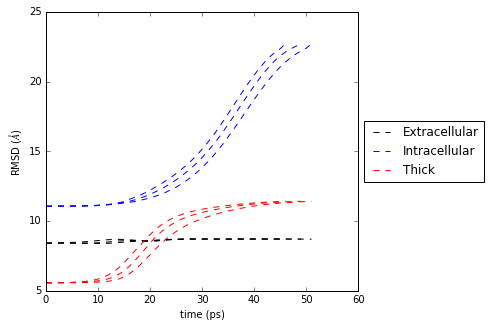

In [9]:
time = len(u1.trajectory)
fig = plt.figure(figsize = (8,5))
ax = fig.add_subplot(111)
ax.plot(a1, 'k--', label = "Extracellular")
ax.plot(a2, 'b--', label = "Intracellular")
ax.plot(a3, 'r--', label = "Thick")
ax.plot(b1, 'k--')
ax.plot(b2, 'b--')
ax.plot(b3, 'r--')
ax.plot(c1, 'k--')
ax.plot(c2, 'b--')
ax.plot(c3, 'r--')
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.7, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_xlabel("time (ps)")
ax.set_ylabel(r"RMSD ($\AA$)")
fig.savefig("mhp1_gate_tseries_if2occ_ANM.pdf")
plt.show()